<a href="https://colab.research.google.com/github/zmiern/ie423/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initialize

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/data/mnist_fashion_train.csv')
df_test = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/data/mnist_fashion_test.csv')

In [4]:
df_train.head(6)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0


In [5]:
df_test.head(6)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,164,58,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6,0,0,0,2,0,1,1,0,0,...,71,12,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,145,129,62,0,0,0,0,0,0,0


In [6]:
# Define target and features
y_train = df_train["label"].ravel()
X_train = scale(df_train.drop(["label"], axis=1))
y_test = df_test["label"].ravel()
X_test = scale(df_test.drop(["label"], axis=1))

Fashion Item 				 Label
AxesImage(size=(28, 28)) 		 9


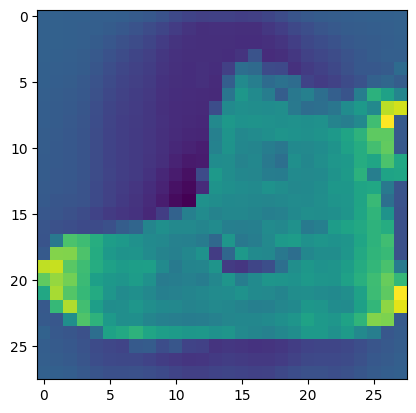

In [7]:
# Display first image
print('Fashion Item', '\t\t\t\t', 'Label')
print(plt.imshow(X_train[0].reshape((28,28))), '\t\t', y_train[0])

In [8]:
# Build Support Vector Machines - Classifier model
from sklearn.svm import SVC

mdlSvmDgt = SVC()
mdlSvmDgt.fit(X_train, y_train)
y_test_pred = mdlSvmDgt.predict(X_test)

print ('Classification Report (Support Vector Classifier):')
print (classification_report(y_test, y_test_pred))

Classification Report (Support Vector Classifier):
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.87      0.89      0.88      1000
           4       0.80      0.82      0.81      1000
           5       0.97      0.96      0.96      1000
           6       0.72      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8       0.95      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [9]:
# Build Neural Network - Multi-Layer Perceptron
from sklearn.neural_network import MLPClassifier
mdlNncDgt = MLPClassifier()
mdlNncDgt.fit(X_train, y_train)
y_test_pred = mdlNncDgt.predict(X_test)
print ('Classification Report (Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.87      0.88      0.88      1000
           4       0.80      0.81      0.80      1000
           5       0.97      0.94      0.96      1000
           6       0.68      0.70      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [10]:
# Build Deep Neural Network - Additional Hidden Layers
mdlDncDgt = MLPClassifier(hidden_layer_sizes=(100,100))
mdlDncDgt.fit(X_train, y_train)
y_test_pred = mdlDncDgt.predict(X_test)

print ('Classification Report (Deep Neural Network):')
print (classification_report(y_test, y_test_pred))

Classification Report (Deep Neural Network):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.78      0.82      0.80      1000
           3       0.88      0.89      0.88      1000
           4       0.81      0.81      0.81      1000
           5       0.96      0.95      0.96      1000
           6       0.70      0.69      0.70      1000
           7       0.95      0.95      0.95      1000
           8       0.97      0.95      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 50, 25)],
    "max_iter": [200, 300],
    "solver": ["adam"],
    "random_state": [1],
}

mlp = MLPClassifier()

grid_search = GridSearchCV(
    estimator=mlp, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

best_mlp = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found:", best_params)

y_pred = best_mlp.predict(X_test)

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'hidden_layer_sizes': (100,), 'max_iter': 200, 'random_state': 1, 'solver': 'adam'}
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.98      0.97      0.97      1000
           2       0.79      0.80      0.79      1000
           3       0.89      0.87      0.88      1000
           4       0.79      0.81      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.70      0.69      0.69      1000
           7       0.94      0.96      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



Best parameters are {'hidden_layer_sizes': (100,), 'max_iter': 200, 'random_state': 1, 'solver': 'adam'} yet scores didn't change that much eventhough their compuatiton times differ.


utexas_ds_orie_divider_gray.png